In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
IMAGE_SIZE = 256,
CHANNELS=3,
BATCH_SIZE = 32

In [5]:


train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10
)

train_generator = train_datagen.flow_from_directory(
    'C:/code/potato-disease/training/dataset/train',
    target_size = (256,256),
    batch_size=32,
    class_mode="sparse",
#     save_to_dir="AugumentedImages"
)

Found 1506 images belonging to 3 classes.


In [33]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [12]:
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10
)

validation_generator = validation_datagen.flow_from_directory(
    'C:/code/potato-disease/training/dataset/val',
    target_size = (256,256),
    batch_size=32,
    class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [13]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'C:/code/potato-disease/training/dataset/test',
         target_size = (256,256),
    batch_size=32,
        class_mode="sparse"
)

Found 431 images belonging to 3 classes.


In [9]:
input_shape = (256, 256, 3)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 64)       

In [15]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [69]:
1506/32

47.0625

In [70]:
215/32

6.71875

In [17]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20
)

Epoch 1/20
47/47 [==============================] - 70s 1s/step - loss: 0.9226 - accuracy: 0.4627 - val_loss: 0.9139 - val_accuracy: 0.5781
Epoch 2/20
47/47 [==============================] - 63s 1s/step - loss: 0.8041 - accuracy: 0.5950 - val_loss: 0.6571 - val_accuracy: 0.7500
Epoch 3/20
47/47 [==============================] - 63s 1s/step - loss: 0.5656 - accuracy: 0.7585 - val_loss: 0.4745 - val_accuracy: 0.8021
Epoch 4/20
47/47 [==============================] - 63s 1s/step - loss: 0.6604 - accuracy: 0.7056 - val_loss: 0.5624 - val_accuracy: 0.7656
Epoch 5/20
47/47 [==============================] - 64s 1s/step - loss: 0.3966 - accuracy: 0.8501 - val_loss: 0.3674 - val_accuracy: 0.8385
Epoch 6/20
47/47 [==============================] - 63s 1s/step - loss: 0.3933 - accuracy: 0.8290 - val_loss: 0.5581 - val_accuracy: 0.7656
Epoch 7/20
47/47 [==============================] - 63s 1s/step - loss: 0.2863 - accuracy: 0.8840 - val_loss: 0.4847 - val_accuracy: 0.8281
Epoch 8/20
47/47 [==

In [18]:
scores = model.evaluate(test_generator)

14/14 [==============================] - 13s 953ms/step - loss: 0.1106 - accuracy: 0.9652


In [19]:
scores


[0.11063994467258453, 0.9651972055435181]

In [20]:
history

In [21]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [22]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [23]:
type(history.history['loss'])


list

In [24]:
len(history.history['loss'])


20

In [25]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.9226438403129578,
 0.8041276931762695,
 0.5655977725982666,
 0.6603651642799377,
 0.3966306746006012]

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [27]:
val_acc

[0.578125,
 0.75,
 0.8020833134651184,
 0.765625,
 0.8385416865348816,
 0.765625,
 0.828125,
 0.84375,
 0.9010416865348816,
 0.875,
 0.8802083134651184,
 0.9114583134651184,
 0.875,
 0.9010416865348816,
 0.9375,
 0.921875,
 0.9739583134651184,
 0.9479166865348816,
 0.9635416865348816,
 0.9791666865348816]

In [28]:
acc

[0.46268656849861145,
 0.5949796438217163,
 0.7584803104400635,
 0.7055630683898926,
 0.8500678539276123,
 0.8290366530418396,
 0.883989155292511,
 0.896879255771637,
 0.9118046164512634,
 0.9050203561782837,
 0.9382632374763489,
 0.9409769177436829,
 0.9246947169303894,
 0.9172320365905762,
 0.9484395980834961,
 0.9531885981559753,
 0.9599728584289551,
 0.9430122375488281,
 0.974219799041748,
 0.98439621925354]

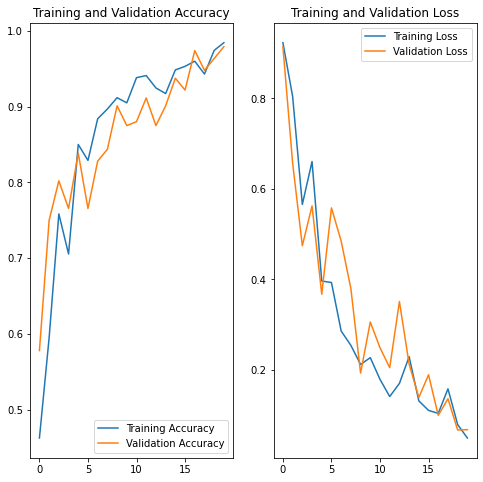

In [29]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___healthy
predicted label: Potato___healthy


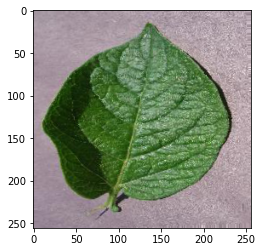

In [34]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [35]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

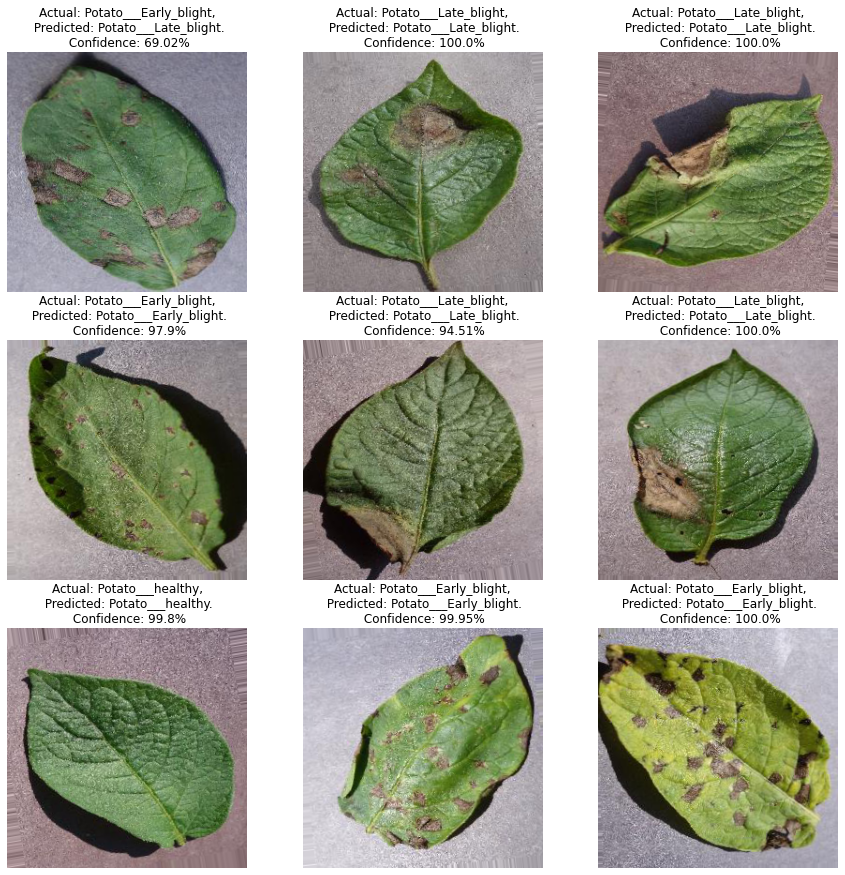

In [36]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [40]:
model.save("../potatoes.h5")